No handles with labels found to put in legend.


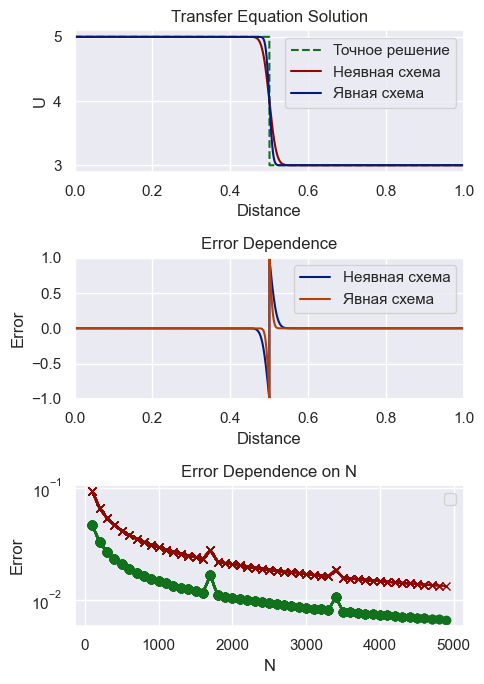

In [62]:

from matplotlib.pyplot import *
import numpy as np
import seaborn as sns
from matplotlib import style


#%matplotlib inline

sns.set(rc={"figure.dpi":100, 'savefig.dpi':400})
sns.set_theme(style="darkgrid", palette="dark")

# dont forget N/Nx = 1/2

H = 1
T = 1

a = 0.5
Max = 5000

# Data arrays
M = np.array([])
X = np.array([])
U = np.array([])
U1 = np.array([])
U2 = np.array([])
Up = np.array([])
S_1 = np.array([])
S_2 = np.array([])

# Errors arrays

E1 = np.array([])
E2 = np.array([])
E_1 = np.array([])
E_2 = np.array([])
figure(figsize = (5,7))

subplot(311)
axis([0, 1, 2.9, 5.1])

xlabel('Distance')
ylabel('U')
title('Transfer Equation Solution')


ln1, = plot(X, Up, 'g--', label = 'Точное решение')
ln2, = plot(X, U1, 'r-', label = 'Неявная схема')
ln3, = plot(X, U2, 'b-', label = 'Явная схема')
tight_layout()
legend()


subplot(312)
axis([0, 1, -1, 1])

xlabel('Distance')
ylabel('Error')
title('Error Dependence')


ln4, = plot(X, E1, label = 'Неявная схема')
ln5, = plot(X, E2, label = 'Явная схема')
tight_layout()
legend()

subplot(313)

axis()
xlabel('N')
ylabel('Error')
title('Error Dependence on N')




tight_layout()
legend()

def real(Nx):
    
    for i in range(Nx):
        
        if X[i] <= a * T:
            Up[i] = 5
            
        else:
            Up[i] = 3
            
    ln1.set_data(X, Up)
    
    return Up


def implicit(Nx, Up1):
    
    
    for time in np.arange(0, T, 2 * T / Nx):

        U = np.copy(U1)

        for i in range(1, Nx):
            U1[i] = 1 / (1 + d) * (U[i] + d * U1[i-1])

        ln2.set_data(X, U1)
        #gcf().canvas.draw()

        y = 0
        U1[y] = 5
        y += 1
        
    for j in range(0, Nx):
        E1[j] = (U1[j] - Up1[j])
        ln4.set_data(X, E1)
    
     
    return 0
   
    
def explicit(Nx, Up1):
    
    for time in np.arange(0, T, T/Nx):
        
        U = np.copy(U2)
        
        for i in range(1, Nx):
            U2[i] = U2[i] + 0.5 * (U[i-1] - U[i])
            
        ln3.set_data(X,U2)
        #gcf().canvas.draw()

        y = 0
        U2[y] = 5
        y += 1
        
    for j in range(0, Nx):
        E2[j] = U2[j] - Up1[j]   
        ln5.set_data(X, E2)
     
    return 0

# Написать прогу выводящую среднюю ошибку, т е вычисляем ошибку во всех точках, усредняем, можно также сделать квадратичку
# Можно найти функцию которая ищет отклонения

for m in range(100, Max, 100):

    X = np.arange(0, H, H / m)

    d = 1

    Up = np.zeros(len(X))

    U = [3] * len(X)
    U[0] = 5

    U1 = np.ones(len(X))*3
    U1[0] = 5

    U2 = np.ones(len(X))*3
    U2[0] = 5


    E1 = [0] * len(X)
    E2 = [0] * len(X)

    real(m)
    implicit(m, Up)
    explicit(m, Up)
    M = np.append(M, m)
    np.append(E_1, abs(E1[int(m/2) - int(m/25)]))
    #ln6, = semilogy(M, E_1, 'go-', label = 'Ошибка неявной схемы')

    np.append(E_2, abs(E2[int(m/2) - int(m/25)]))
    #ln7, = semilogy(M, E_2, 'rx-', label = 'Ошибка явной схемы')
    #ln6.set_data(M, E_1)
    #ln7.set_data(M, E_2)

    sq_err_1 = np.mean((U1 - Up)**2)
    S_1 = np.append(S_1, sq_err_1)
    sq_err_2 = np.mean((U2-Up)**2)
    S_2 = np.append(S_2, sq_err_2)
    ln8, = semilogy(M, S_1, 'rx-')
    ln9, = semilogy(M, S_2, 'go-')


gcf().canvas.draw()



МАСЯ КУКУ

C:\Users\Admin\AppData\Local\Temp/ipykernel_13480/3396460230.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


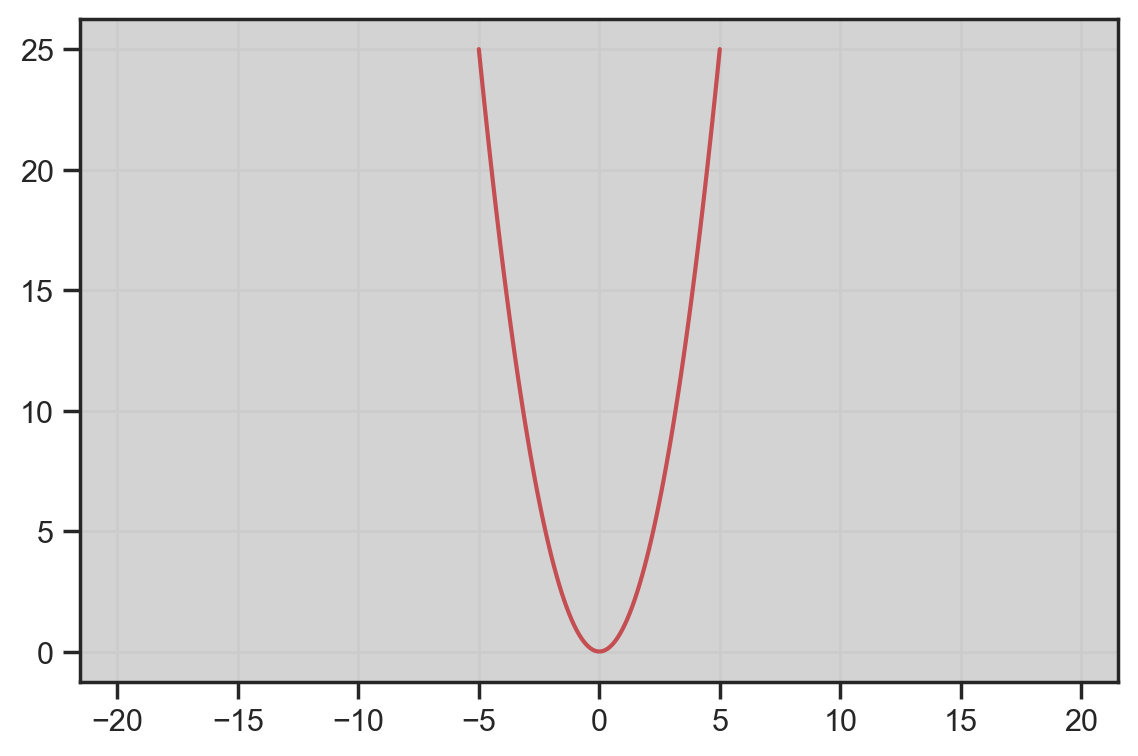

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

x = np.linspace(-5, 5, 100)
y = x**2




#fig, ax = plt.subplots(1, facecolor = (), figsize=(8, 6))



fig, ax = plt.subplots()
# 2) hex string:
ax.set_facecolor('lightgray')
ax.grid()
fig.tight_layout()
ax = plt.axis('equal')

fig = plt.plot(x, y, '-r')

plt.show()





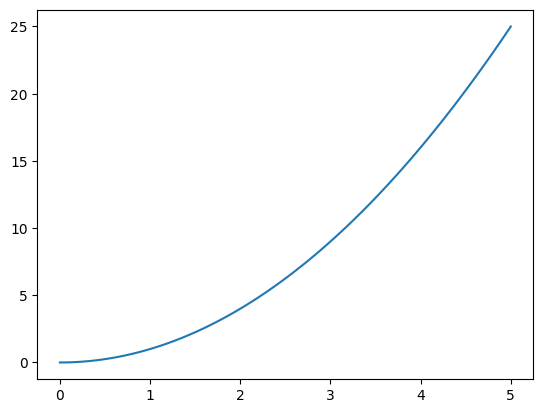

In [38]:
import matplotlib.pyplot 
import numpy as np


x = np.linspace(0, 5, 100)
y = x**2


subplot(111)

plot(x,y)

gcf().canvas.draw()

[1. 1. 1. 1. 1.]


In [63]:
A = np.copy(M)
B = np.copy(S_1)
C = np.copy(S_2)

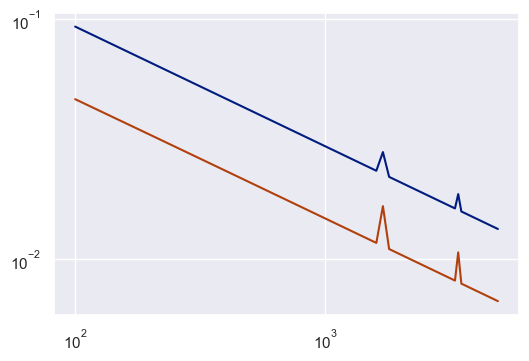

In [70]:
yscale('log')
xscale('log')
plot(A, B)
plot(A, C)